In [22]:
%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
import glob
import sys
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from tqdm.notebook import tqdm

import SNOM_Import


In [24]:
sys.path.append('/mnt/c/Users/conor/Git_Projects/PHD')

In [121]:
files = dict()

for i, file_path in tqdm(enumerate(glob.glob("/mnt/c/Users/conor/Git_Projects/PHD/CRUK Grant/*HEADR*")[-20:])):

    file_name = file_path.split('/')[-1].split('HEADR')[0]
    files[file_name] = SNOM_Import.SNOM_File(file_path[:-14])


In [122]:
df = pd.DataFrame({name: vars(file) for name, file in files.items()}).T

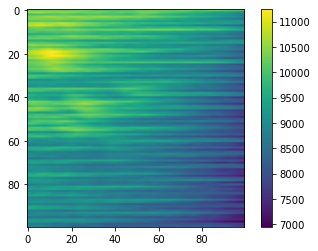

In [123]:
ax=plt.imshow(df.iloc[3].FTOPO)
plt.colorbar(ax)

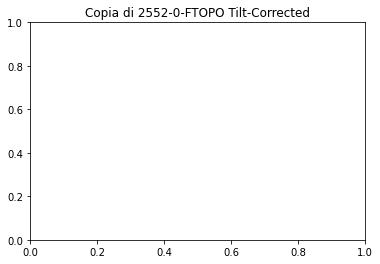

In [6]:
fig, ax1 = plt.subplots(ncols=1)

for i, row in df.iloc[-70:,:].iterrows():
    try:
        ax1.set_title(i+ 'FTOPO Tilt-Corrected')
        ax1.imshow(row.images['FTOPO']-plane_correct(row.images['FTOPO']))

        fig.savefig(os.path.join(os.getcwd(), 'Tilt_Corrected_Images' ,f"{i}-FTOPO Tilt-Corrected.png"), bbox_inches = 'tight')

    except: pass

In [7]:
def plane_correct(image):

    m, n = image.shape

    X1, X2 = np.mgrid[:m, :m]

    X = np.hstack((np.reshape(X1, (m*m, 1)) , np.reshape(X2, (m*m, 1)) ) )
    X = np.hstack((np.ones((m*m, 1)) , X ))
    YY = np.reshape(image, (m*m, 1))

    theta = np.dot(np.dot( np.linalg.pinv(np.dot(X.transpose(), X)), X.transpose()), YY)

    plane = np.reshape(np.dot(X, theta), (m, m));
    Y_corr = image-plane

    return plane


Text(0.5, 1.0, 'Corrected Topo')

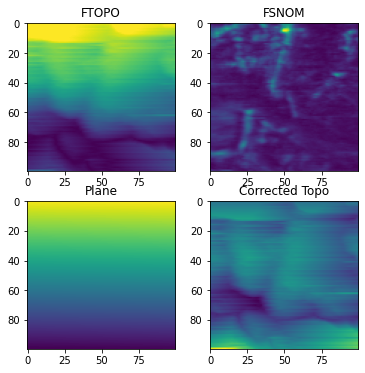

In [125]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2, figsize=(6,6))

im_file= df.iloc[9]

ftopo = im_file.FTOPO
fsnom = im_file.FSNOM

plane = plane_correct(ftopo)

plane_n = (plane)/plane.max()
fsnom_n = (fsnom)/fsnom.max()

ax1.imshow(ftopo);
ax1.set_title("FTOPO")
ax2.imshow(fsnom);
ax2.set_title('FSNOM')
ax3.imshow(plane);
#ax3.imshow(((fsnom_n - plane_n)*fsnom.max()))
ax3.set_title('Plane')
ax4.imshow(ftopo-plane)
ax4.set_title('Corrected Topo')